In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [3]:
import numpy as np
import sklearn

print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)

NumPy version: 2.0.2
scikit-learn version: 1.6.1


In [4]:
#/content/drive/MyDrive/rihal-codestacker-main/ML/Competition_Dataset.csv
import pandas as pd

# Load the dataset from the given path
file_path = "/content/drive/MyDrive/rihal-codestacker-main/ML/train_data.csv"
data = pd.read_csv(file_path)

data.head()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Category
0,2005-09-19 01:00:00,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,BAYVIEW,NONE,100 Block of KISKA RD,-122.375989,37.730158,VANDALISM
1,2004-07-25 12:45:00,CONSPIRACY,Sunday,BAYVIEW,"ARREST, BOOKED",1000 Block of OAKDALE AV,-122.380348,37.728828,OTHER OFFENSES
2,2012-03-24 02:00:00,GRAND THEFT FROM LOCKED AUTO,Saturday,BAYVIEW,NONE,1000 Block of RHODEISLAND ST,-122.401641,37.755838,LARCENY/THEFT
3,2011-03-27 22:00:00,WARRANT ARREST,Sunday,MISSION,"ARREST, BOOKED",2200 Block of MISSION ST,-122.419212,37.761024,WARRANTS
4,2014-12-10 16:30:00,LOST PROPERTY,Wednesday,SOUTHERN,NONE,ELLIS ST / MARKET ST,-122.405832,37.785745,NON-CRIMINAL


##Level 1: Exploratory Data Analysis (EDA)

  The police need your help with categorizing crimes quickly!
*   Part A: Predicting Crime Type


    *   Build a model to classify crimes based on their description (Descript).
    *   The goal is to predict the crime category (Category) using supervised learning.
    *   Evaluate the model’s accuracy and discuss potential improvements.


check missing values

In [5]:
print(data.shape)

#check if there are missing values
print("null values" , data.isnull().sum())
print("null values" , data.isnull().values.any())


(544660, 9)
null values Dates            0
Descript         0
DayOfWeek        0
PdDistrict       0
Resolution       0
Address          0
Latitude (Y)     0
Longitude (X)    0
Category         0
dtype: int64
null values False


In [6]:
#check duplicated rows
duplicate_rows = data.duplicated()
print("duplicate rows, " , duplicate_rows.sum())


duplicate rows,  7249


In [7]:
#drop the duplicated rows
data = data.drop_duplicates()
print("updated data shape ," , data.shape)


updated data shape , (537411, 9)


In [8]:
#count dates
print(type(data['Dates'][0]))
print(pd.to_datetime(data['Dates']).dt.month_name().unique())
print(pd.to_datetime(data['Dates']).dt.month_name().value_counts())


<class 'str'>
['September' 'July' 'March' 'December' 'January' 'August' 'November'
 'June' 'October' 'May' 'February' 'April']
Dates
October      48873
May          48431
April        47955
March        46592
January      44973
November     44621
September    43895
June         43456
February     43223
July         42812
August       42538
December     40042
Name: count, dtype: int64


In [9]:
#len of Descript
exploring = data[['Descript']].copy()

exploring['Descript_leng'] = exploring['Descript'].str.split().apply(len)

print(exploring[['Descript', 'Descript_leng']].head())


                                    Descript  Descript_leng
0  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES              5
1                                 CONSPIRACY              1
2               GRAND THEFT FROM LOCKED AUTO              5
3                             WARRANT ARREST              2
4                              LOST PROPERTY              2


Mean of descript length :  3.5292913617324544
Median of descript length :  3.0
Most common (mode): 2 words


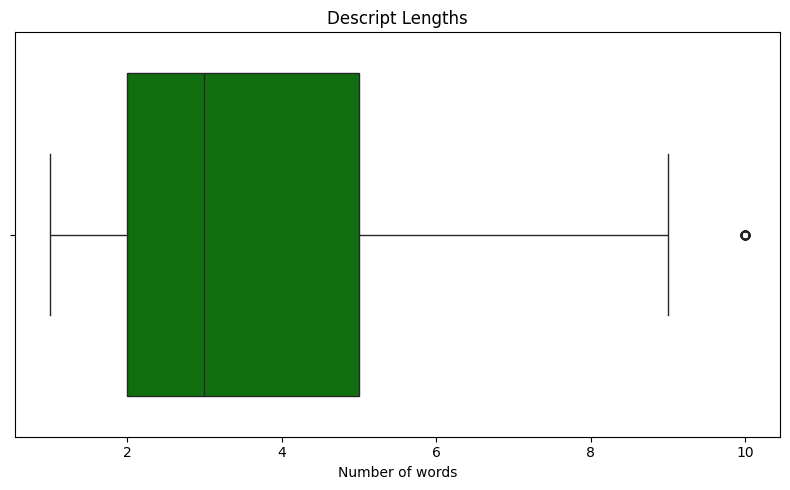

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_len = exploring['Descript_leng'].mean()
median_len = exploring['Descript_leng'].median()
mode_len = exploring['Descript_leng'].mode()[0]

print("Mean of descript length : ",mean_len)
print("Median of descript length : ",median_len)
print(f"Most common (mode): {mode_len} words")



plt.figure(figsize=(8, 5))
sns.boxplot(x=exploring['Descript_leng'], color='green')

plt.title('Descript Lengths')
plt.xlabel('Number of words')
plt.tight_layout()
plt.show()



DayOfWeek
Monday       74836
Tuesday      76753
Wednesday    79347
Thursday     76862
Friday       82499
Saturday     77254
Sunday       69860
Name: count, dtype: int64


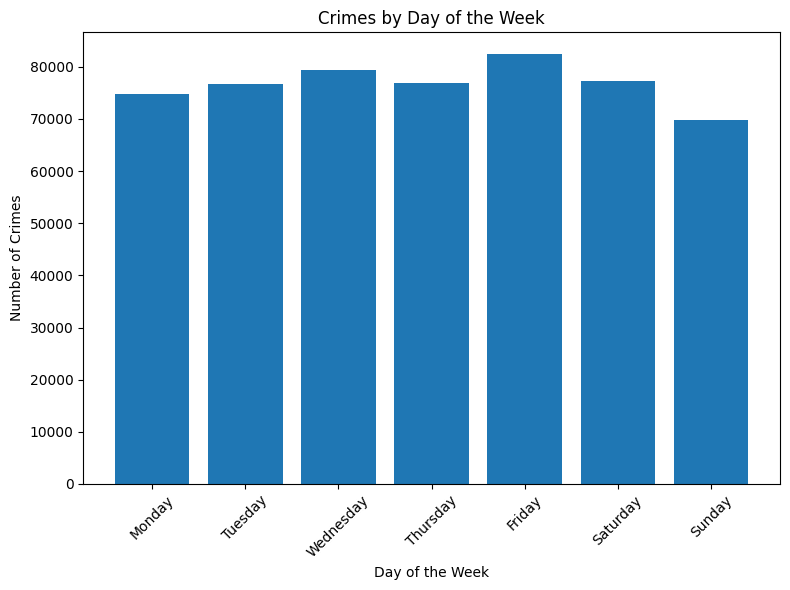

In [11]:
import matplotlib.pyplot as plt
import calendar

weekNameOrdered = list(calendar.day_name)
DayOfWeek_c = data['DayOfWeek'].value_counts().reindex(weekNameOrdered)

print(DayOfWeek_c)
plt.figure(figsize=(8, 6))
plt.bar(DayOfWeek_c.index, DayOfWeek_c.values)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
#none for unsolved crimes
data['Resolution'].value_counts()


,count
Resolution,
NONE,337201
"ARREST, BOOKED",110415
"ARREST, CITED",47320
LOCATED,12112
PSYCHOPATHIC CASE,10258
UNFOUNDED,6236
JUVENILE BOOKED,2928
NOT PROSECUTED,2490
JUVENILE CITED,1889


<ipython-input-13-db4a20244a1d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby([data['DayOfWeek'], pd.to_datetime(data['Dates']).dt.hour]).size().unstack(fill_value=0)


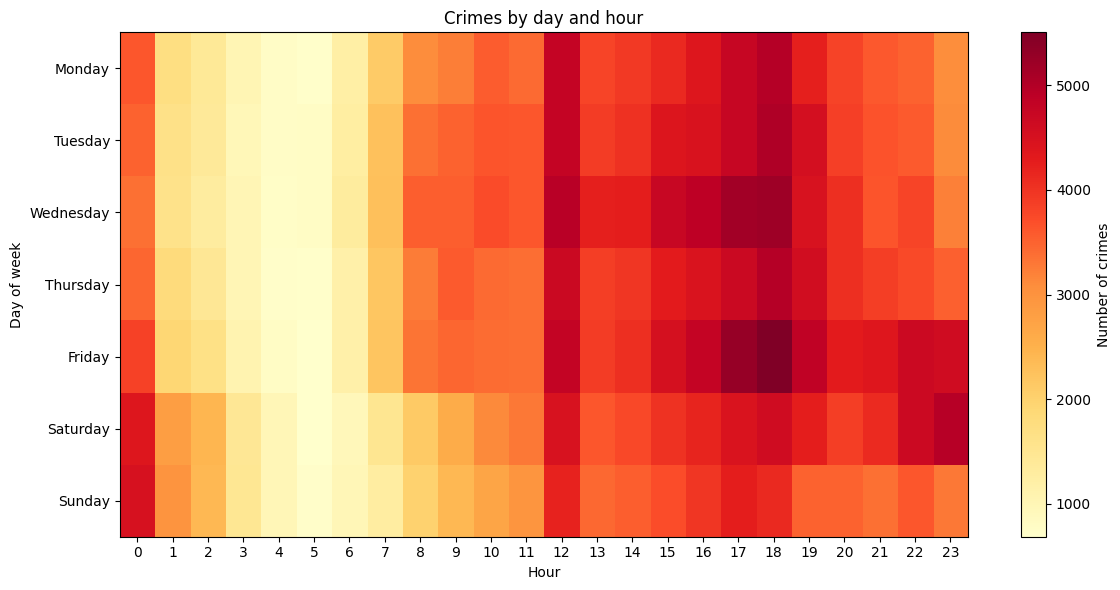

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

#order
data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=list(calendar.day_name), ordered=True)
heatmap_data = data.groupby([data['DayOfWeek'], pd.to_datetime(data['Dates']).dt.hour]).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
plt.title('Crimes by day and hour')
plt.xlabel('Hour')
plt.ylabel('Day of week')
#h
plt.xticks(np.arange(24), labels=range(24))
#days
plt.yticks(np.arange(7), labels=heatmap_data.index)

plt.colorbar(label='Number of crimes')

plt.tight_layout()
plt.show()



###I noticed that the latitude and longitude are swapped

In [14]:
print(data.columns.tolist())


['Dates', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)', 'Category']


In [15]:
#fix
data['Latitude real (Y)'] = data['Longitude (X)']
data['Longitude real (X)'] = data['Latitude (Y)']


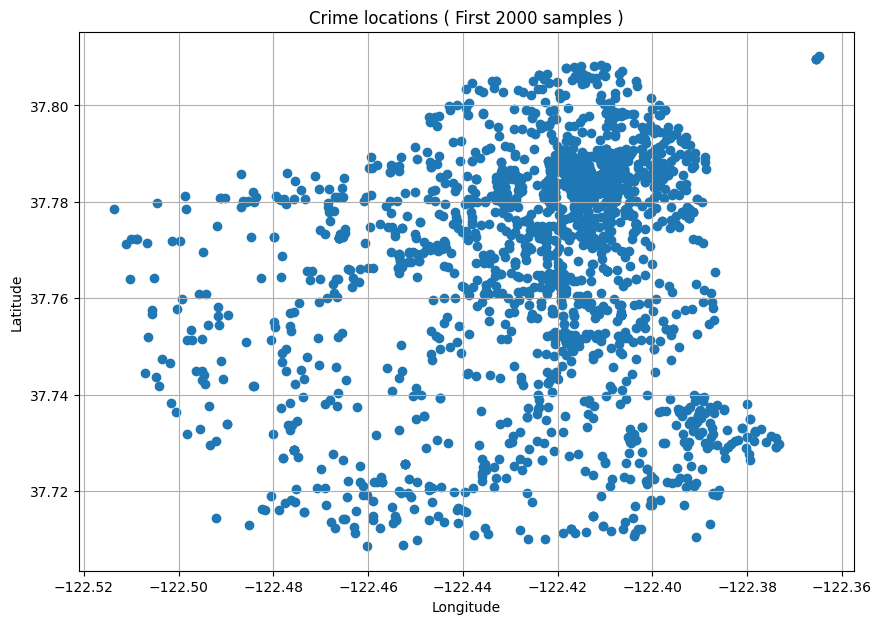

In [16]:
import matplotlib.pyplot as plt

sample_df = data[['Latitude real (Y)', 'Longitude real (X)']].head(2000)

plt.figure(figsize=(10, 7))
plt.scatter(sample_df['Longitude real (X)'], sample_df['Latitude real (Y)'])
plt.title("Crime locations ( First 2000 samples )")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


Category
LARCENY/THEFT             125339
OTHER OFFENSES             88619
NON-CRIMINAL               66327
VEHICLE THEFT              38469
VANDALISM                  31917
WARRANTS                   30559
DRUG/NARCOTIC              29722
BURGLARY                   26325
SUSPICIOUS OCC             22579
MISSING PERSON             18572
ROBBERY                    16625
FRAUD                      12019
FORGERY/COUNTERFEITING      7063
WEAPON LAWS                 5481
TRESPASS                    5268
DISORDERLY CONDUCT          3074
RECOVERED VEHICLE           2232
KIDNAPPING                  1677
STOLEN PROPERTY             1593
RUNAWAY                     1356
ARSON                       1096
EMBEZZLEMENT                 829
BAD CHECKS                   279
BRIBERY                      207
EXTORTION                    184
Name: count, dtype: int64


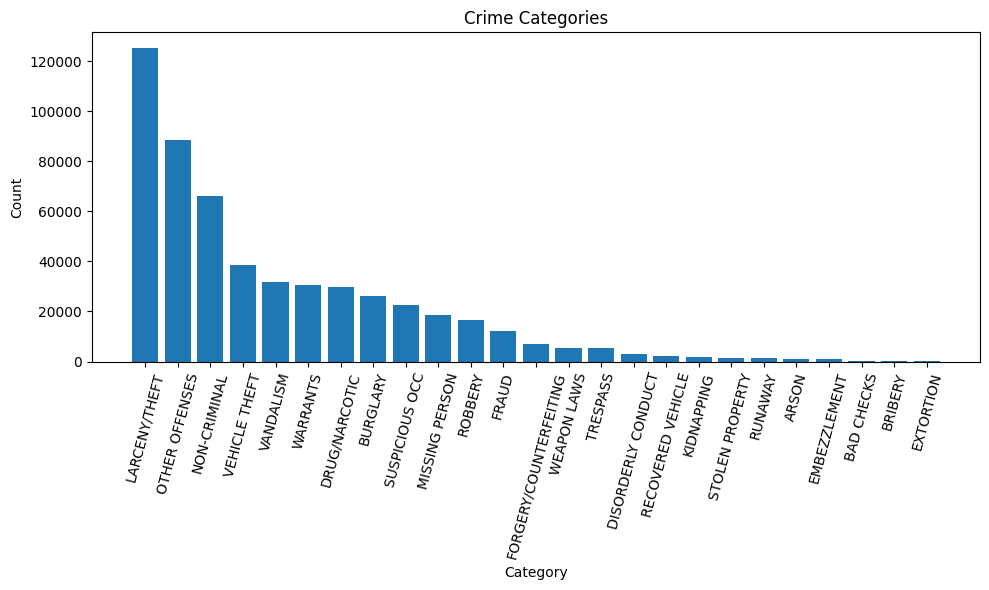

In [17]:
count_category = data['Category'].value_counts()
print(count_category)


plt.figure(figsize=(10, 6))
plt.bar(count_category.index, count_category.values)
plt.title('Crime Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


I noticed the following patterns in the data:
*   Imbalance in Crime Data: The dataset shows an imbalance in crime categories and might affect the performance of model
*   Clustering of Crime Locations: Many crimes appear to be concentrated in similar areas, which could suggest hotspots for further investigation.

*   Peak Crime Times (12 am - 6 pm): The data indicates that most crimes occur during the afternoon to early evening .

*   Balanced Days of the Week: The day of the week appears to be balanced, suggesting no specific day is more likely for crimes.

##pre processing

In [18]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'-]", '', text)
    return text.strip()

data['PreDescript'] = data['Descript'].apply(clean_text)


In [19]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [20]:
# Check  sizes
print("Training data size" , train_data.shape)
print("val data size" ,val_data.shape )

Training data size (429928, 12)
val data size (107483, 12)


In [21]:
#map Category to num for classification

allCategory = data['Category'].unique()
print(allCategory)
categoryDict = {category: i for i, category in enumerate(allCategory)}

train_data['Category'] = data['Category'].map(categoryDict)

val_data['Category'] = data['Category'].map(categoryDict)

print(train_data)

['VANDALISM' 'OTHER OFFENSES' 'LARCENY/THEFT' 'WARRANTS' 'NON-CRIMINAL'
 'MISSING PERSON' 'ROBBERY' 'BURGLARY' 'VEHICLE THEFT' 'SUSPICIOUS OCC'
 'STOLEN PROPERTY' 'DRUG/NARCOTIC' 'KIDNAPPING' 'TRESPASS' 'FRAUD'
 'WEAPON LAWS' 'FORGERY/COUNTERFEITING' 'DISORDERLY CONDUCT' 'ARSON'
 'RECOVERED VEHICLE' 'RUNAWAY' 'EMBEZZLEMENT' 'EXTORTION' 'BAD CHECKS'
 'BRIBERY']
                      Dates                                  Descript  \
162017  2014-03-09 00:01:00                   PETTY THEFT OF PROPERTY   
50203   2008-03-05 19:00:00              MALICIOUS MISCHIEF, GRAFFITI   
38484   2010-11-07 11:00:00                     SUSPICIOUS OCCURRENCE   
397060  2010-12-30 09:00:00              CREDIT CARD, THEFT BY USE OF   
436466  2011-06-15 21:01:00                    PETTY THEFT WITH PRIOR   
...                     ...                                       ...   
110593  2007-05-05 12:00:00              PETTY THEFT FROM LOCKED AUTO   
260947  2014-04-30 09:01:00  STAY AWAY OR COURT ORDER

In [22]:
#checking
overlapping_rows = pd.merge(train_data, val_data, how='inner')

print(f"Number of overlapping rows: {len(overlapping_rows)}")


Number of overlapping rows: 0


In [23]:
#get the Category
train_labels = train_data["Category"].astype(int).tolist()
val_labels =val_data["Category"].astype(int).tolist()

print(train_labels)

[2, 0, 9, 14, 2, 2, 4, 7, 8, 1, 4, 2, 1, 2, 5, 4, 3, 2, 1, 7, 1, 0, 2, 2, 2, 13, 1, 6, 7, 2, 2, 8, 1, 2, 2, 3, 4, 2, 1, 1, 9, 7, 2, 11, 4, 8, 2, 0, 0, 2, 11, 1, 4, 2, 11, 8, 19, 1, 2, 1, 9, 2, 0, 1, 1, 4, 16, 8, 3, 5, 1, 8, 2, 4, 2, 7, 4, 0, 6, 14, 1, 2, 4, 2, 1, 1, 2, 2, 4, 6, 11, 2, 4, 2, 0, 2, 2, 3, 7, 4, 3, 4, 1, 3, 2, 2, 8, 9, 1, 3, 6, 14, 2, 0, 2, 4, 3, 2, 2, 4, 2, 2, 7, 7, 2, 5, 2, 17, 1, 2, 1, 2, 23, 1, 12, 7, 18, 9, 14, 8, 11, 1, 3, 16, 1, 4, 11, 1, 2, 2, 4, 5, 1, 2, 0, 1, 3, 3, 2, 11, 1, 2, 0, 3, 1, 2, 3, 3, 13, 7, 6, 0, 2, 0, 6, 1, 1, 11, 21, 4, 4, 0, 4, 9, 2, 2, 4, 4, 4, 2, 2, 1, 1, 1, 4, 7, 0, 1, 2, 1, 2, 15, 8, 1, 1, 6, 11, 1, 2, 2, 8, 2, 17, 1, 2, 6, 13, 7, 8, 11, 1, 5, 1, 7, 3, 11, 4, 11, 3, 9, 0, 5, 8, 2, 6, 1, 1, 2, 2, 2, 2, 19, 9, 2, 8, 3, 7, 2, 2, 7, 4, 0, 7, 7, 3, 0, 2, 7, 8, 21, 1, 2, 1, 1, 11, 6, 4, 2, 3, 2, 2, 11, 4, 4, 11, 2, 6, 1, 16, 0, 2, 11, 1, 1, 3, 16, 2, 13, 2, 2, 2, 11, 2, 2, 13, 4, 1, 4, 3, 2, 2, 2, 2, 7, 4, 2, 9, 8, 4, 9, 1, 1, 13, 0, 1, 5, 4, 1, 6, 6

##train

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report



vectorizer_tfidf = TfidfVectorizer(max_features=5000 )

train_tfidf = vectorizer_tfidf.fit_transform(train_data['PreDescript'])
val_tfidf = vectorizer_tfidf.transform(val_data['PreDescript'])

log_reg_model = LogisticRegression(max_iter=1000 , class_weight='balanced')
log_reg_model.fit(train_tfidf, train_labels)


y_pred = log_reg_model.predict(val_tfidf)


accuracy = accuracy_score(val_labels, y_pred)
print("Accuracy: ",accuracy)

print(classification_report(val_labels, y_pred))

#Accuracy: 0.9959014251692808 with ngram_range=(1, 2)
# 0.9962000462862731 without ngram_range=(1, 2)

Accuracy:  0.9969948736079194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6294
           1       1.00      1.00      1.00     17595
           2       1.00      1.00      1.00     25127
           3       1.00      1.00      1.00      6184
           4       1.00      1.00      1.00     13369
           5       1.00      1.00      1.00      3758
           6       1.00      1.00      1.00      3309
           7       1.00      1.00      1.00      5209
           8       1.00      0.97      0.98      7625
           9       1.00      1.00      1.00      4643
          10       1.00      1.00      1.00       319
          11       1.00      1.00      1.00      5913
          12       1.00      1.00      1.00       348
          13       1.00      1.00      1.00      1054
          14       1.00      1.00      1.00      2450
          15       0.99      1.00      1.00      1103
          16       1.00      1.00      1.00      13

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer(max_features=5000)
vectorized_trainV = vectorizer.fit_transform(train_data['PreDescript'])
vectorized_ValV = vectorizer.transform(val_data['PreDescript'])

RandomForest_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
RandomForest_model.fit(vectorized_trainV, train_labels)

#Predict
val_predicted = RandomForest_model.predict(vectorized_ValV)


RandomForest_accuracy = accuracy_score(val_labels, val_predicted)
print("Accuracy (TF-IDF + Random Forest):" , RandomForest_accuracy)
print(classification_report(val_labels, val_predicted))
#Accuracy (TF-IDF + Random Forest): 0.9972 with n-gram
#Accuracy (TF-IDF + Random Forest): 0.9972460761236661 without n-graam

Accuracy (TF-IDF + Random Forest): 0.9972460761236661
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6294
           1       1.00      1.00      1.00     17595
           2       1.00      1.00      1.00     25127
           3       1.00      1.00      1.00      6184
           4       1.00      1.00      1.00     13369
           5       1.00      1.00      1.00      3758
           6       1.00      1.00      1.00      3309
           7       1.00      1.00      1.00      5209
           8       1.00      0.97      0.98      7625
           9       1.00      1.00      1.00      4643
          10       1.00      1.00      1.00       319
          11       1.00      1.00      1.00      5913
          12       1.00      1.00      1.00       348
          13       1.00      1.00      1.00      1054
          14       1.00      1.00      1.00      2450
          15       1.00      1.00      1.00      1103
          16       1.00    

In [28]:
print(data.groupby('Descript')['Category'].nunique().value_counts())


Category
1    602
2      7
Name: count, dtype: int64
515


In [28]:
val_predicted

array([0, 0, 7, ..., 8, 2, 4])

In [29]:
val_final = val_data.copy()
val_final['Predicted_Category'] = val_predicted

save the model for level 4

In [24]:
import joblib


joblib.dump(RandomForest_model, 'RandomForest_model.pkl')

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [25]:
import json

# categoryDict to map catogory if needed
with open('category_dict.json', 'w') as dict_file:
    json.dump(categoryDict, dict_file)


The high accuracy scores are primarily due to the fact that the crime descriptions are often very predictable, with many descriptions consisting of only three words. Additionally, the category names often share similar words with the descriptions, making it easier for the model to correctly predict the category. Even after dropping duplicates, the dataset still shows significant class imbalance, with categories like Category 1 having 602 instances and Category 2 having only 7, as shown by print(data.groupby('Descript')['Category'].nunique().value_counts()). This imbalance further influences the model’s high accuracy, as it is more likely to predict the more frequent categories.


**Part B**: Assigning Crime Severity
Classify each crime into the following severity levels based on its category:
Severity 1: NON-CRIMINAL, SUSPICIOUS OCCURRENCE, MISSING PERSON, RUNAWAY, RECOVERED VEHICLE
Severity 2: WARRANTS, OTHER OFFENSES, VANDALISM, TRESPASS, DISORDERLY CONDUCT, BAD CHECKS
Severity 3: LARCENY/THEFT, VEHICLE THEFT, FORGERY/COUNTERFEITING, DRUG/NARCOTIC, STOLEN PROPERTY, FRAUD, BRIBERY, EMBEZZLEMENT
Severity 4: ROBBERY, WEAPON LAWS, BURGLARY, EXTORTION
Severity 5: KIDNAPPING, ARSON
This part can be implemented using simple conditional logic.
Output both predicted crime type and assigned severity.

Part B

In [30]:
returnLableDict = {v: k for k, v in categoryDict.items()}
val_final['Predicted_Category'] = [returnLableDict[i] for i in val_predicted]
val_final['Category'] = [returnLableDict[i] for i in val_labels]


In [31]:
val_final

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Category,Latitude real (Y),Longitude real (X),PreDescript,Predicted_Category
365757,2013-11-02 18:00:00,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Saturday,MISSION,NONE,2000 Block of MISSION ST,-122.419658,37.764221,VANDALISM,37.764221,-122.419658,malicious mischief vandalism of vehicles,VANDALISM
204755,2004-11-22 08:00:00,"MALICIOUS MISCHIEF, VANDALISM",Monday,BAYVIEW,NONE,300 Block of DWIGHT ST,-122.406103,37.723082,VANDALISM,37.723082,-122.406103,malicious mischief vandalism,VANDALISM
106258,2008-11-15 12:00:00,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Saturday,TARAVAL,NONE,0 Block of CORONA ST,-122.467308,37.722597,BURGLARY,37.722597,-122.467308,burglary of residence forcible entry,BURGLARY
76243,2013-08-20 03:00:00,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,SOUTHERN,"ARREST, BOOKED",300 Block of BEALE ST,-122.391986,37.788020,WARRANTS,37.788020,-122.391986,enroute to outside jurisdiction,WARRANTS
164710,2006-05-17 10:00:00,"CREDIT CARD, THEFT BY USE OF",Wednesday,CENTRAL,NOT PROSECUTED,MARKET ST / FREMONT ST,-122.398267,37.791715,FRAUD,37.791715,-122.398267,credit card theft by use of,FRAUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244181,2005-11-01 12:30:00,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,INGLESIDE,"ARREST, BOOKED",PARIS ST / GENEVA AV,-122.439438,37.715674,WARRANTS,37.715674,-122.439438,enroute to outside jurisdiction,WARRANTS
119131,2008-03-09 17:20:00,THROWING SUBSTANCE AT VEHICLE,Sunday,TARAVAL,NONE,19TH AV / ORTEGA ST,-122.476294,37.752377,OTHER OFFENSES,37.752377,-122.476294,throwing substance at vehicle,OTHER OFFENSES
507709,2012-03-20 16:30:00,STOLEN TRUCK,Tuesday,RICHMOND,NONE,DIVISADERO ST / PACIFIC AV,-122.441334,37.792511,VEHICLE THEFT,37.792511,-122.441334,stolen truck,VEHICLE THEFT
520495,2008-12-13 23:00:00,GRAND THEFT OF PROPERTY,Saturday,NORTHERN,NONE,1700 Block of POLK ST,-122.421075,37.792838,LARCENY/THEFT,37.792838,-122.421075,grand theft of property,LARCENY/THEFT


In [36]:
severityDic = {
    "NON-CRIMINAL": "Severity 1",
    "SUSPICIOUS OCC": "Severity 1", #SUSPICIOUS OCCURRENCE to SUSPICIOUS OCC
    "MISSING PERSON": "Severity 1",
    "RUNAWAY": "Severity 1",
    "RECOVERED VEHICLE": "Severity 1",
    "WARRANTS": "Severity 2",
    "OTHER OFFENSES": "Severity 2",
    "VANDALISM": "Severity 2",
    "TRESPASS": "Severity 2",
    "DISORDERLY CONDUCT": "Severity 2",
    "BAD CHECKS": "Severity 2",
    "LARCENY/THEFT": "Severity 3",
    "VEHICLE THEFT": "Severity 3",
    "FORGERY/COUNTERFEITING": "Severity 3",
    "DRUG/NARCOTIC": "Severity 3",
    "STOLEN PROPERTY": "Severity 3",
    "FRAUD": "Severity 3",
    "BRIBERY": "Severity 3",
    "EMBEZZLEMENT": "Severity 3",
    "ROBBERY": "Severity 4",
    "WEAPON LAWS": "Severity 4",
    "BURGLARY": "Severity 4",
    "EXTORTION": "Severity 4",
    "KIDNAPPING": "Severity 5",
    "ARSON": "Severity 5"
}


val_final['Assigned_Severity'] = val_final['Predicted_Category'].map(lambda x: severityDic.get(x, 'Unk'))


In [37]:
unknowns = val_final[ val_final['Assigned_Severity'] == 'Unk' ]['Predicted_Category'].value_counts()
print(unknowns)


Series([], Name: count, dtype: int64)


In [38]:
val_final.head()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Category,Latitude real (Y),Longitude real (X),PreDescript,Predicted_Category,Assigned_Severity
365757,2013-11-02 18:00:00,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Saturday,MISSION,NONE,2000 Block of MISSION ST,-122.419658,37.764221,VANDALISM,37.764221,-122.419658,malicious mischief vandalism of vehicles,VANDALISM,Severity 2
204755,2004-11-22 08:00:00,"MALICIOUS MISCHIEF, VANDALISM",Monday,BAYVIEW,NONE,300 Block of DWIGHT ST,-122.406103,37.723082,VANDALISM,37.723082,-122.406103,malicious mischief vandalism,VANDALISM,Severity 2
106258,2008-11-15 12:00:00,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Saturday,TARAVAL,NONE,0 Block of CORONA ST,-122.467308,37.722597,BURGLARY,37.722597,-122.467308,burglary of residence forcible entry,BURGLARY,Severity 4
76243,2013-08-20 03:00:00,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,SOUTHERN,"ARREST, BOOKED",300 Block of BEALE ST,-122.391986,37.788020,WARRANTS,37.788020,-122.391986,enroute to outside jurisdiction,WARRANTS,Severity 2
164710,2006-05-17 10:00:00,"CREDIT CARD, THEFT BY USE OF",Wednesday,CENTRAL,NOT PROSECUTED,MARKET ST / FREMONT ST,-122.398267,37.791715,FRAUD,37.791715,-122.398267,credit card theft by use of,FRAUD,Severity 3


In [45]:
val_final

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Category,Latitude real (Y),Longitude real (X),PreDescript,Predicted_Category,Assigned_Severity
365757,2013-11-02 18:00:00,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Saturday,MISSION,NONE,2000 Block of MISSION ST,-122.419658,37.764221,VANDALISM,37.764221,-122.419658,malicious mischief vandalism of vehicles,VANDALISM,Severity 2
204755,2004-11-22 08:00:00,"MALICIOUS MISCHIEF, VANDALISM",Monday,BAYVIEW,NONE,300 Block of DWIGHT ST,-122.406103,37.723082,VANDALISM,37.723082,-122.406103,malicious mischief vandalism,VANDALISM,Severity 2
106258,2008-11-15 12:00:00,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Saturday,TARAVAL,NONE,0 Block of CORONA ST,-122.467308,37.722597,BURGLARY,37.722597,-122.467308,burglary of residence forcible entry,BURGLARY,Severity 4
76243,2013-08-20 03:00:00,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,SOUTHERN,"ARREST, BOOKED",300 Block of BEALE ST,-122.391986,37.788020,WARRANTS,37.788020,-122.391986,enroute to outside jurisdiction,WARRANTS,Severity 2
164710,2006-05-17 10:00:00,"CREDIT CARD, THEFT BY USE OF",Wednesday,CENTRAL,NOT PROSECUTED,MARKET ST / FREMONT ST,-122.398267,37.791715,FRAUD,37.791715,-122.398267,credit card theft by use of,FRAUD,Severity 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244181,2005-11-01 12:30:00,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,INGLESIDE,"ARREST, BOOKED",PARIS ST / GENEVA AV,-122.439438,37.715674,WARRANTS,37.715674,-122.439438,enroute to outside jurisdiction,WARRANTS,Severity 2
119131,2008-03-09 17:20:00,THROWING SUBSTANCE AT VEHICLE,Sunday,TARAVAL,NONE,19TH AV / ORTEGA ST,-122.476294,37.752377,OTHER OFFENSES,37.752377,-122.476294,throwing substance at vehicle,OTHER OFFENSES,Severity 2
507709,2012-03-20 16:30:00,STOLEN TRUCK,Tuesday,RICHMOND,NONE,DIVISADERO ST / PACIFIC AV,-122.441334,37.792511,VEHICLE THEFT,37.792511,-122.441334,stolen truck,VEHICLE THEFT,Severity 3
520495,2008-12-13 23:00:00,GRAND THEFT OF PROPERTY,Saturday,NORTHERN,NONE,1700 Block of POLK ST,-122.421075,37.792838,LARCENY/THEFT,37.792838,-122.421075,grand theft of property,LARCENY/THEFT,Severity 3


In [39]:
#save the val_final :
val_final.to_csv("crime_severity_Val.csv", index=False)


In [40]:
#save data
#severity to main data csv

data['Assigned_Severity'] = data['Category'].map(lambda x: severityDic.get(x, 'Unk'))

data.to_csv("final_data.csv", index=False)


In [41]:
unknownsData = data[ data['Assigned_Severity'] == 'Unk' ]['Category'].value_counts()
print(unknownsData)


Series([], Name: count, dtype: int64)


In [42]:
data.head()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Category,Latitude real (Y),Longitude real (X),PreDescript,Assigned_Severity
0,2005-09-19 01:00:00,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,BAYVIEW,NONE,100 Block of KISKA RD,-122.375989,37.730158,VANDALISM,37.730158,-122.375989,malicious mischief vandalism of vehicles,Severity 2
1,2004-07-25 12:45:00,CONSPIRACY,Sunday,BAYVIEW,"ARREST, BOOKED",1000 Block of OAKDALE AV,-122.380348,37.728828,OTHER OFFENSES,37.728828,-122.380348,conspiracy,Severity 2
2,2012-03-24 02:00:00,GRAND THEFT FROM LOCKED AUTO,Saturday,BAYVIEW,NONE,1000 Block of RHODEISLAND ST,-122.401641,37.755838,LARCENY/THEFT,37.755838,-122.401641,grand theft from locked auto,Severity 3
3,2011-03-27 22:00:00,WARRANT ARREST,Sunday,MISSION,"ARREST, BOOKED",2200 Block of MISSION ST,-122.419212,37.761024,WARRANTS,37.761024,-122.419212,warrant arrest,Severity 2
4,2014-12-10 16:30:00,LOST PROPERTY,Wednesday,SOUTHERN,NONE,ELLIS ST / MARKET ST,-122.405832,37.785745,NON-CRIMINAL,37.785745,-122.405832,lost property,Severity 1


###evaluation

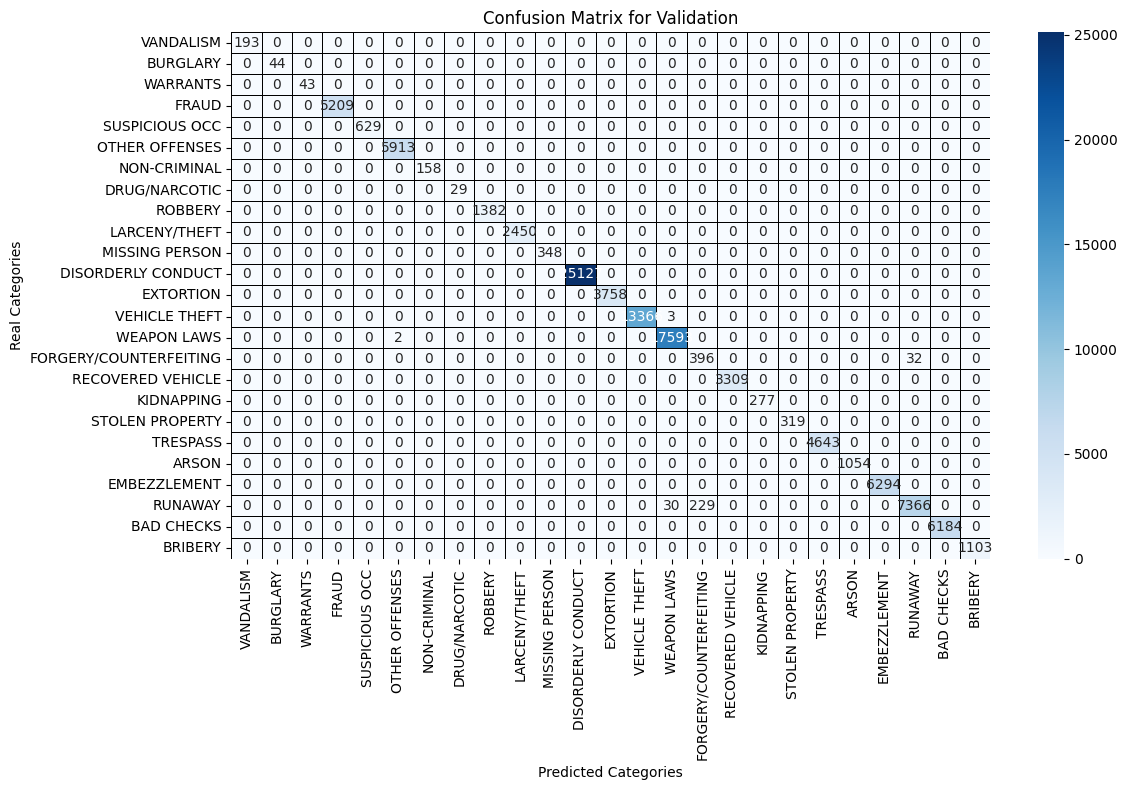

In [60]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

category_names = list(val_final['Category'].unique())
confusion_matrixVal = confusion_matrix(val_final['Category'], val_final['Predicted_Category'])


#name category
namedconfusion_matrixVal = pd.DataFrame(confusion_matrixVal, index=category_names,  columns=category_names)
plt.figure(figsize=(12, 8))
sns.heatmap(namedconfusion_matrixVal, annot=True, fmt='d', cmap='Blues', linewidths=0.4, linecolor='black')


plt.title('Confusion Matrix for Validation')
plt.xlabel('Predicted Categories')
plt.ylabel('Real Categories')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

